# Dynamic Programming and Structural Econometrics #4b

### Portfolio Choice Example:  Numerical Integration

**Readings:** 
- 📖 Judd, K. L. (1998). Numerical methods in economics. MIT press. Sections 7.6

by Bertel Schjerning

University of Copenhagen

## Plan for lectures

Illustrate in integration methods by economic example:
***Portfolio choice model***

- *Model presentation*

- *Numerical Integration*: Evaluate expected value/utility of a given portfolio with stochastic returns
    - Mutidimentional Guassian quadrature
    - Monte Carlo: Simulation based integration (breaks the curse of dimensionality)
- **Optimization (TODAY) **: Maximize agents expected utility by choosing optimal allocation of wealth in a number of risky assets
    - Newtons method
    - Line Searching
    - Non-gradient based solvers (e.g. Nelder-Mead)


### Portfolio choice: Constrained optimization problem
We consider an investor who allocates current wealth, $W$ across $n$ assets indexed by $i=0,\dots, n-1$. 

$$
\max_{(\omega_0, \dots, \omega_{n-1})} E \left\{u\left(\sum_{i=0}^{n-1} \omega_i Z_i\right)\right\} \\
s.t. \sum_{i=0}^{n-1} \omega_i p_i  - W = 0
$$
where asset $i$ has price $p_i$ and a stochastic future value $Z_i$ whose distribution we will specify later. 

- This is a **$n$-dimensional constrained optimization problem** with one equality constraint
- Expectation operator requires evaluating a **$n$-dimensional integral**




### Portfolio choice: unconstrained optimization problem
We can easily impose the budget constraint by substituting $\omega_0 = W - \sum_{i=1}^{n-1}\omega_i p_i$ into the utility function and eliminating $\omega_0$ from the choice set 

The resulting $n-1$-dimensional ***unconstrained optimization problem*** is

$$
\max_{\omega}  U(\omega) =  \max_{\omega} E \left\{u\left(( W - \sum_{i=1}^{n-1}\omega_i)Z_0  + \sum_{i=1}^{n-1} \omega_i Z_i\right)\right\} \label{eq: pp_unconstrained}
$$

where $\omega=(\omega_1, \dots, \omega_{n-1})$  is the vector of portfolio choices.

For simplicity we will assume that all assets have the same price of $1\$$ and set $W=1$ throughout, so that $\omega_i$ refers to the portfolio share in asset $i$.  


### Computing expected utility
For an independent log-normally distributed variable, we also make the change of variable  $Z_i(q_i)=\exp(\mu_i + \sigma \Phi^{-1}(q_i))$ to obtain 
\begin{eqnarray}
U(\omega)&=&E \left\{u\left(( W - \sum_{i=2}^n\omega_i)Z_0(q_0)  + \sum_{i=1}^n \omega_i Z_i(q_i)\right)\right\} \nonumber \\
&=&\int_0^1 \dots \int_0^1 \left\{u\left(( W - \sum_{i=2}^n\omega_i)Z_0(q_0)  + \sum_{i=1}^n \omega_i Z_i(q_i)\right)\right\}dq_0 \dots dq_{n-1} \nonumber \\
&=&\int_{[0,1]^n} f(q;\omega)dq  \nonumber
\end{eqnarray}
where $q=(q_0, \dots, q_{n-1})$ the the vector of uniformly distributed quantiles in the asset return distribution and 
\begin{eqnarray}
f(q;\omega)=u\left(( W - \sum_{i=2}^n\omega_i)Z_0(q_0)  + \sum_{i=1}^n \omega_i Z_i(q_i)\right)
\end{eqnarray}
is the ex-post utility of receiving an asset return from the $q'th$ percentile in the distribution of asset returns.  



### Using Gauss-Legendre quadrature we can then approximate $U(\omega)$ as
\begin{eqnarray}
U(\omega)& \approx &\sum_{j_0=1}^{m_0} \dots \sum_{j_{n-1}=1}^{m_{n-1}}   w^0_{j_0}  \dots w^{n-1}_{j_{n-1}}  f(x_{j_0}^{0},  \dots, x^{n-1}_{j_{n-1}};\omega)
\end{eqnarray}
where 

- $w^i_{j_i}$  and $x^{i}_{j_{i}}$ are Gauss-Legendre weights and nodes for integration dimension $i$ (i.e. asset $i$) adjusted for integration over the interval $[0,1]$ rather than $[-1,1]$. 
- Since Gauss-Legendre is for integration over the interval $[0,1]$ rather than $[-1,1]$, we need to adjust weights $w^{[-1,1]}$ and nodes $x^{[-1,1]}$ for integration on $[a,b]=[0,1]$. 
- The relevant change of variable to the interval $[a,b]$ is $w=(b-a)/2*w^{[-1,1]}$ for the weights and $x=(x^{[-1,1]} + 1)(b-a)/2 +a $ for nodes. 


## Monte Carlo
Alternatively, we can use simple Monte Carlo integration to approximate $U(\omega)$ 
\begin{eqnarray}
U(\omega)& \approx &1/m\sum_{j=1}^m f(x^j; \omega) \nonumber
\end{eqnarray}
where $x^j=(x^j_0 \dots, x^j_{n-1})$ is $n-$vector of pseudo random draws from the uniform distribution. 

- Note for our one dimensional case with only one risky asset, we only need one random componet, so $x^j$ is a scalar

- Very similar to Gauss-Legendre.. except that the $m$ weights are just w=1/m and nodes are replaced by $m$ draws from the uniform distribution with support $[0,1]^m$

- **BREAKS curse of dimensionality**: The error diminishes with a rate $1/\sqrt{m}$ which is idenependent of the dimension of $x$ 



In [1]:
# The model outlined above collected in the module portfolio that we import below
%reset -f
import numpy as np
from lib.portfolio import *
from lib.optimize import *
import lib.integrate as intpy


### Example: model with two assets 
Model 1: One safe asset, one risky asset
- Mean returns, $E(Z)=R=(R_0,R_1)=(1.1,1.4)'$
- Variance on returns, $\sigma^2_Z=(\sigma^2_{Z_0},\sigma^2_{Z_1})=(0.0,1)'$
- With and without correlated returns, $Z_i$ between assets

Model 2: Two risky assets
- Mean returns, $E(Z)=R=(R_0,R_1)=(1.1,1.4)'$
- Variance on returns, $\sigma^2_Z=(\sigma^2_{Z_0},\sigma^2_{Z_1})=(0.5,1)'$
- With and without correlated returns, $Z_i$ between assets


       


In [2]:
## create new model with one safe asset, one risky asset
model1=portfolio(W=1, sigma2_Z =np.array([0,1]), R=np.array([1,1.4]), gamma=2)
# create new model with two risky assets 
model2=portfolio(W=1, sigma2_Z =np.array([0.5,1]), R=np.array([1.1,1.4]), gamma=2)

Model from portfolio class with attributes:
------------------------------------------------------------
CRRA utility parameter, gamma           =  2
Initial wealht, W                       =  1
Mean return on assets , R.T               =  [[1.  1.4]]
Std. dev. on return on assets, sigma_Z.T  =  [[0. 1.]]
Number of assets, n                     =  2
Number of quad nodes for each assset, m =  [10 10]
Correlation matrix, (log asset return), Cor:
 [[1. 0.]
 [0. 1.]]
Cholesky matrix, (log asset return), Sigma:
 [[0.     0.    ]
 [0.     0.6421]]
Model id = 0x7fca167b7d30

Model from portfolio class with attributes:
------------------------------------------------------------
CRRA utility parameter, gamma           =  2
Initial wealht, W                       =  1
Mean return on assets , R.T               =  [[1.1 1.4]]
Std. dev. on return on assets, sigma_Z.T  =  [[0.70710678 1.        ]]
Number of assets, n                     =  2
Number of quad nodes for each assset, m =  [10 10]
Correl

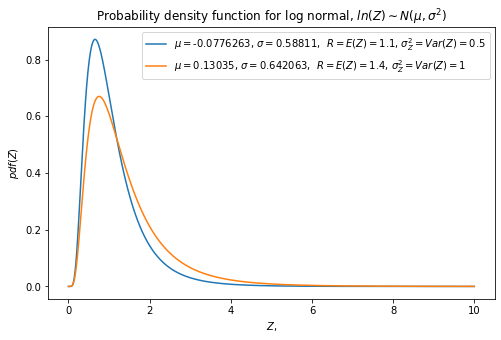

In [3]:
# Plot pdf for returns to all assets (model 1)
model2.plt_pdf_Z()

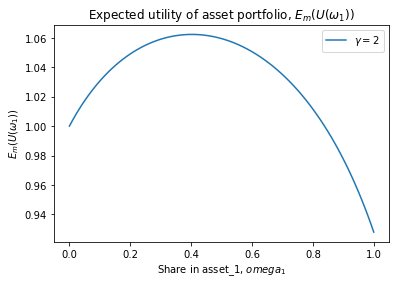

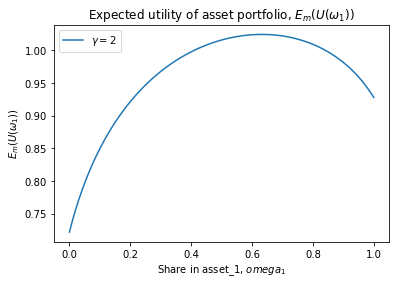

In [4]:
# Plot expected utility of asset portfolio by omega 
model1.plt_E_U(xvec=np.linspace(0, 1, 100), xvar="omega", gammas=[2])
model2.plt_E_U(xvec=np.linspace(0, 1, 100), xvar="omega", gammas=[2])

In [5]:
n=model1.n
omega0=1/n*np.ones((n-1, 1)) # staring values for omega
omega_model1=newton(model1.E_u, omega0, use_derivatives=1, linesearch=0)
omega_model2=newton(model2.E_u, omega0, use_derivatives=1, linesearch=0)
print('portfolio share in asset 1, model 1 (one safe asset)', omega_model1.T)
print('portfolio share in asset 1, model 2 (two risky assets)', omega_model2.T)

Starting values:  [[0.40317508]]
iter       step      ||dx||    ||g(x)||         f(x)
----------------------------------------------------------------------------------------------------
   0           1    9.68e-02    5.83e-02      1.0595
   1           1    6.21e-04    3.74e-04      1.0624
   2           1    9.25e-08    5.58e-08      1.0624
   3           1    2.03e-15    1.22e-15      1.0624
Newton converged after 4 iterations, ||g(x)|| = 1.2245e-15
Elapsed time: 0.0063 seconds
Starting values:  [[0.62925727]]
iter       step      ||dx||    ||g(x)||         f(x)
----------------------------------------------------------------------------------------------------
   0           1    1.29e-01    1.29e-01       1.016
   1           1    3.25e-03    3.21e-03      1.0245
   2           1    4.34e-06    4.31e-06      1.0245
   3           1    8.09e-12    8.02e-12      1.0245
Newton converged after 4 iterations, ||g(x)|| = -8.0190e-12
Elapsed time: 0.0029 seconds
portfolio share in asset 

### Example: model with mutiple identical assets
Model 3: n identical risky assets
- Mean returns, $E(Z_i)=1.4,\quad  i=0,...n-1$
- Variance on returns, $\sigma^2_{Z_i}=1 ,\quad 0=1,...n-1$  

- With and without correlated returns, $Z_i$ between assets

Model 4: One safe asset, n-1 risky assets
- As Model 3, but with $E(Z_0)=1.1$  and $\sigma^2_{Z_0}=0$  

       


In [6]:
n=5 # Number of assets

# build covariance matrix
c=0;  # correlation between assets
corr=(1-c)*np.identity(n) + c*np.ones((n,n)); # correlation martrix

# create new model with n identical risky assets
R=1.4*np.ones((n,1))
sigma2_Z=1.0*np.ones((n,1))
model3=portfolio(W=1, sigma2_Z =sigma2_Z, R=R, corr=corr, gamma=2, m=100000 , integration_method="montecarlo")

## create new model one safe asset, n-1 risky assets
R[0,0]=1.1; 
sigma2_Z[0,0]=0.0001;
model4=portfolio(W=1, sigma2_Z = sigma2_Z, R=R, corr=corr, gamma=2,  m=100000, integration_method="montecarlo")

Model from portfolio class with attributes:
------------------------------------------------------------
CRRA utility parameter, gamma           =  2
Initial wealht, W                       =  1
Mean return on assets , R.T               =  [[1.4 1.4 1.4 1.4 1.4]]
Std. dev. on return on assets, sigma_Z.T  =  [[1. 1. 1. 1. 1.]]
Number of assets, n                     =  5
Number of quad nodes for each assset, m =  100000
Correlation matrix, (log asset return), Cor:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Cholesky matrix, (log asset return), Sigma:
 [[0.6421 0.     0.     0.     0.    ]
 [0.     0.6421 0.     0.     0.    ]
 [0.     0.     0.6421 0.     0.    ]
 [0.     0.     0.     0.6421 0.    ]
 [0.     0.     0.     0.     0.6421]]
Model id = 0x7fca169d3160

Model from portfolio class with attributes:
------------------------------------------------------------
CRRA utility parameter, gamma           =  2
Initial wealht, W          

In [7]:
# solve models 3 and 4
# Try turning on and off derivatives (how is speed affected and why)
# Consider different model sizes (number of asstes - n in prev block)
# Consider how correlation between assets affects optimal porfolio (c in prev block)
# Consider different inegration methods (integration_method in prev block)
omega0=1/n*np.ones((n-1, 1))*0 # staring values for omega
omega_model3=newton(model3.E_u, omega0, use_derivatives=1, linesearch=0)
omega_model4=newton(model4.E_u, omega0, use_derivatives=1, linesearch=0)
print('portfolio share in asset 1, model 3 (n risky)', omega_model3.T)
print('portfolio share in asset 1, model 4 (one safe)', omega_model4.T)

Starting values:  [[0.03155404 0.02943916 0.03257384 0.0292884 ]]
iter       step      ||dx||    ||g(x)||         f(x)
----------------------------------------------------------------------------------------------------
   0           1    3.26e-02    1.40e+00     0.91449
   1           1    6.02e-02    7.16e-01      1.0347
   2           1    8.06e-02    3.14e-01      1.1485
   3           1    3.49e-02    8.37e-02      1.2081
   4           1    2.03e-03    4.80e-03      1.2134
   5           1    1.20e-05    3.17e-05      1.2135
   6           1    5.54e-10    1.45e-09      1.2135
Newton converged after 7 iterations, ||g(x)|| = -1.4105e-09
Elapsed time: 0.5623 seconds
Starting values:  [[0.1214591  0.12000673 0.12264387 0.12068906]]
iter       step      ||dx||    ||g(x)||         f(x)
----------------------------------------------------------------------------------------------------
   0           1    1.23e-01    2.51e-01      1.0908
   1           1    1.26e-01    1.02e-01       